In [ ]:
!nvidia-smi

Thu Aug 15 10:35:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hmWwD633kHXznyTfDqQS")
project = rf.workspace("redlightrunningdection").project("traffic-detection-sutq6")
version = project.version(36)
dataset = version.download("yolov8")


In [ ]:


!yolo task=detect mode=train model=yolov8s.pt data=/content/traffic-detection-36/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 21.5M/21.5M [00:00<00:00, 404MB/s]
New https://pypi.org/project/ultralytics/8.2.77 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/traffic-detection-36/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

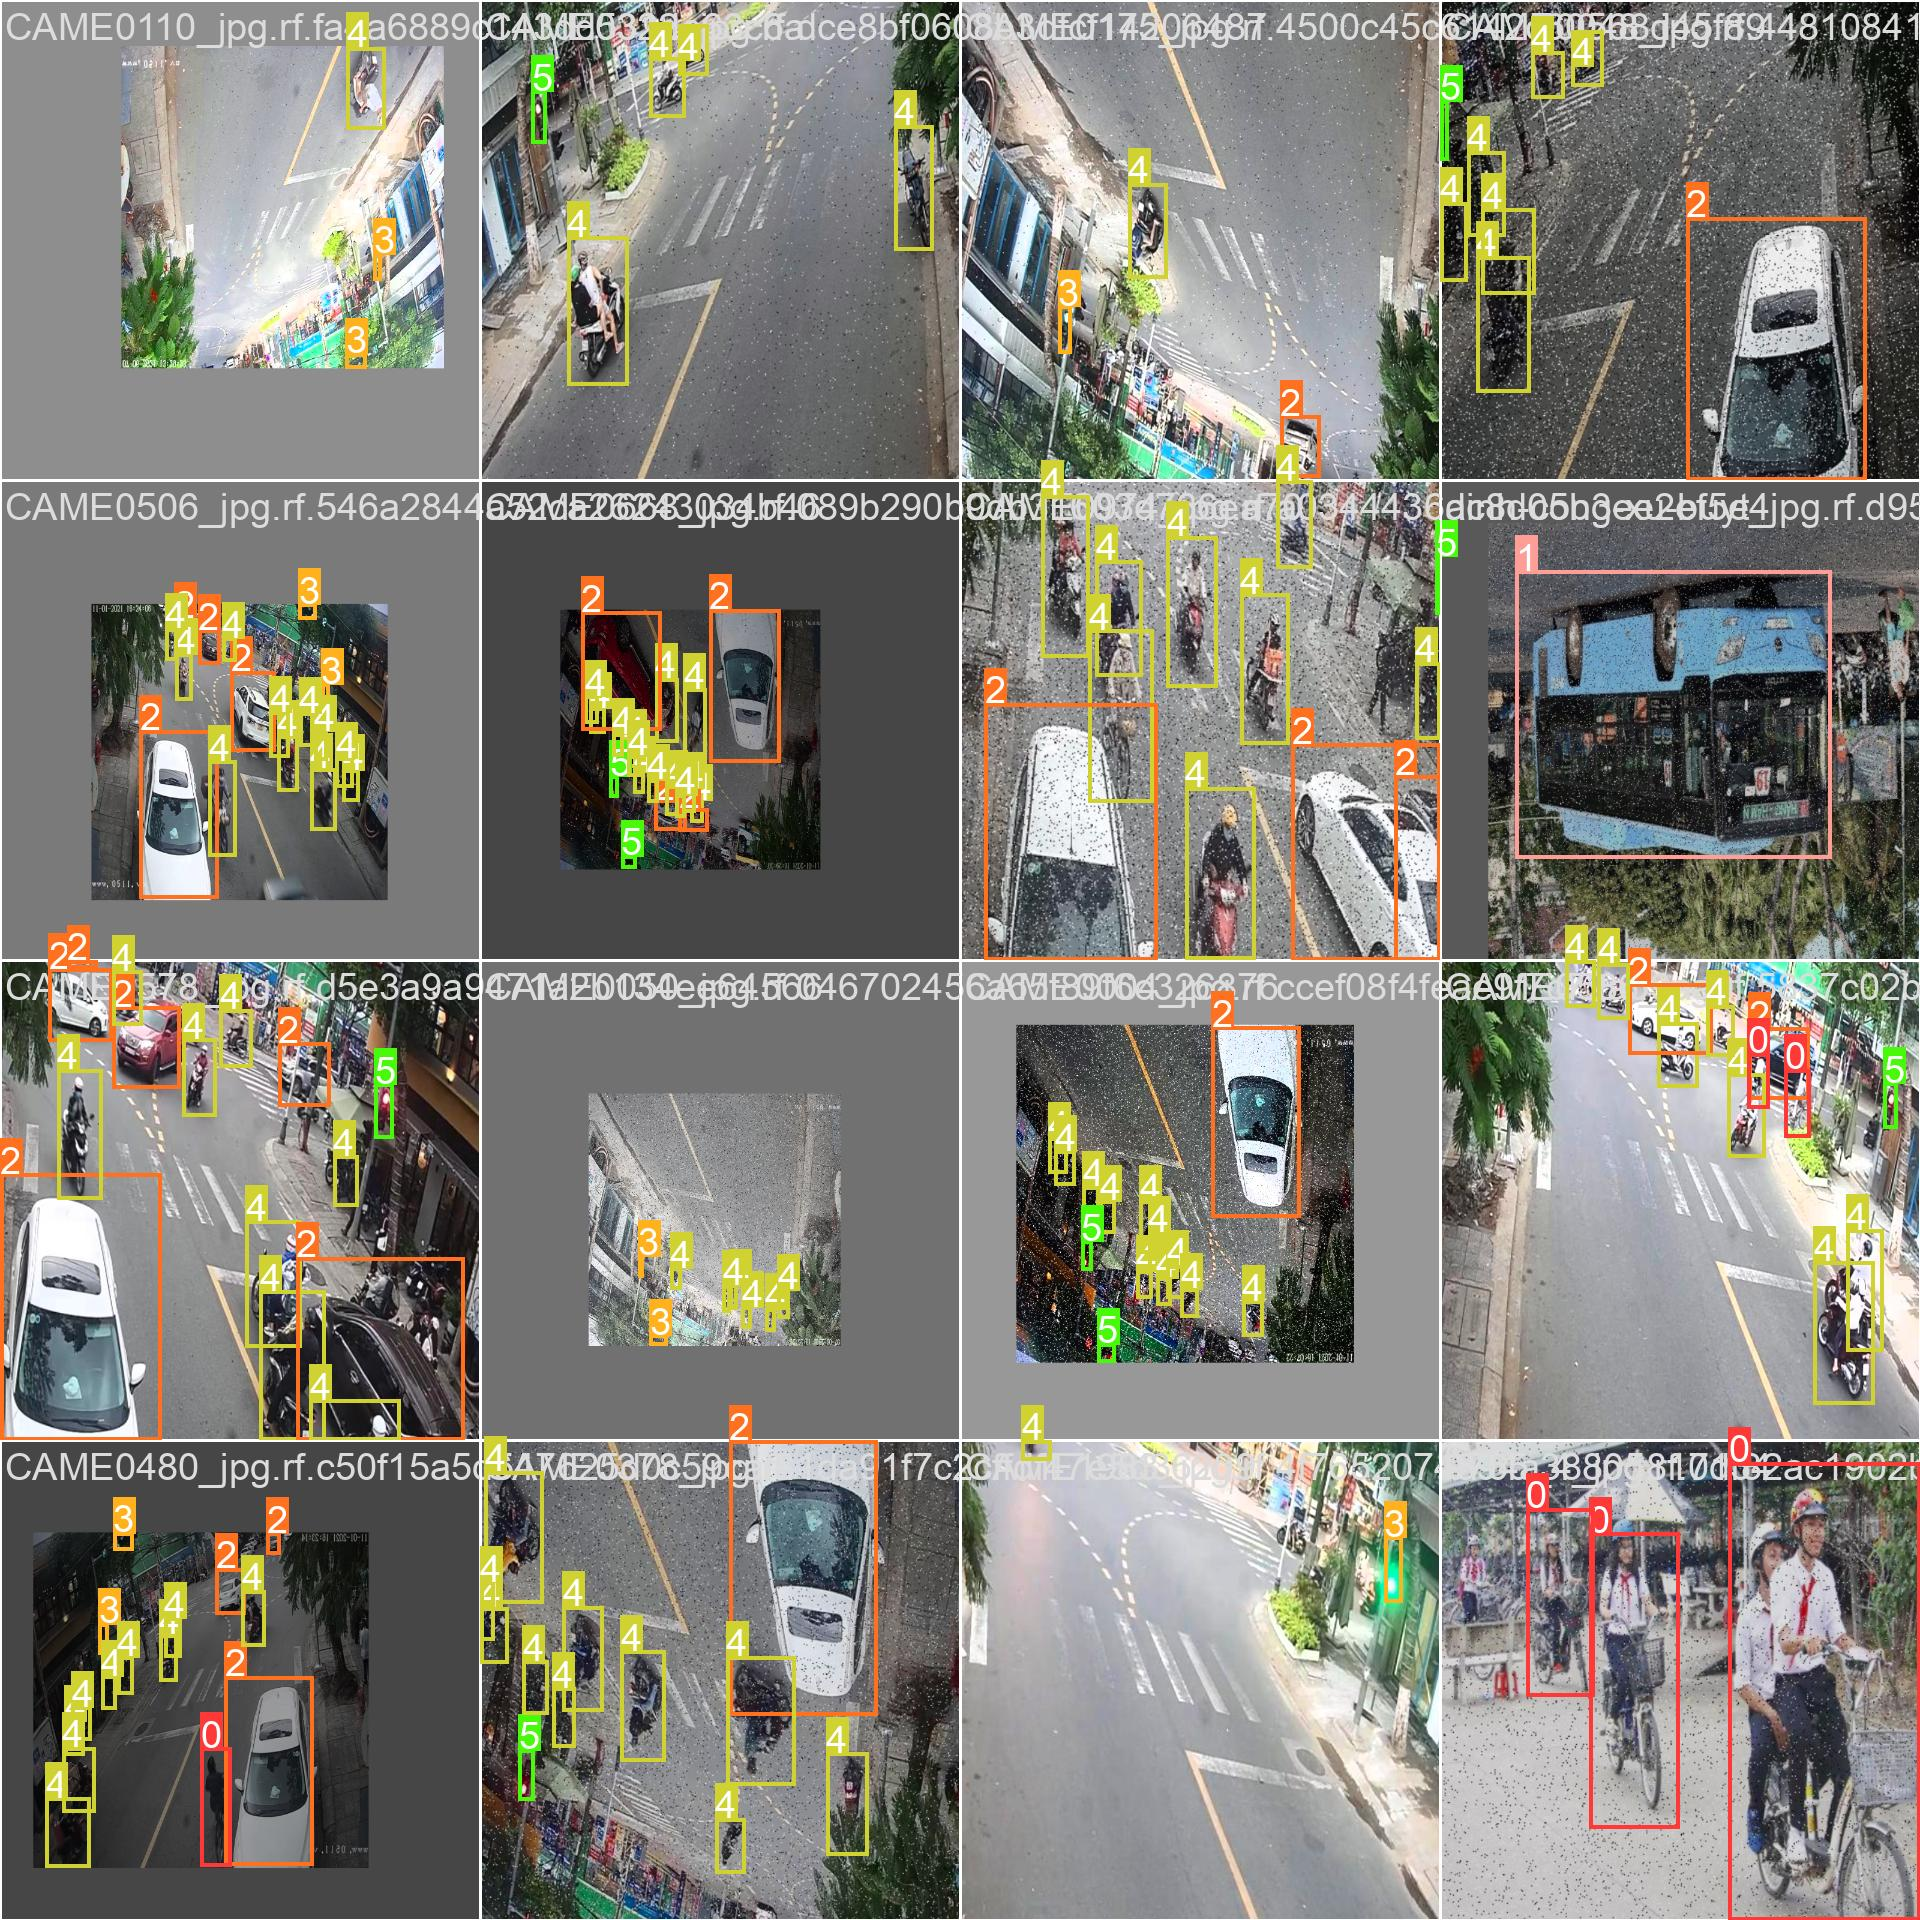

In [ ]:
Image(filename='/content/runs/detect/train/train_batch2942.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/traffic-detection-36/valid/labels.cache... 268 images, 0 backgrounds, 0 corrupt: 100% 268/268 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/traffic-detection-36/valid/images/CAME0009_jpg.rf.486d39d789d8f7558e29fab1bbbf9cd2.jpg: 18 duplicate labels removed
val: WARNING ⚠️ /content/traffic-detection-36/valid/images/CAME0013_jpg.rf.8d76fcf1a2d2f11c491cfcab2b769876.jpg: 12 duplicate labels removed
val: WARNING ⚠️ /content/traffic-detection-36/valid/images/CAME0026_jpg.rf.ec47c6febf8393f08ee3ed6afae37a7e.jpg: 14 duplicate labels removed
val: WARNING ⚠️ /content/traffic-detection-36/valid/images/CAME0081_jpg.rf.2b4f7863d356d1bdc530a9fdb318d305.jpg: 33 duplicate labels removed
val: WARNING ⚠️ /content/traffic-detection-36/valid/images/CAME0165_jpg.rf.59125d0bc341cbfac256c7347fcefc1a.jpg: 27 duplicate labels 

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/traffic-detection-36/test/images/09150443_jpg.rf.16d31a12129870d702b2948e8dd305c0.jpg save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/traffic-detection-36/test/images/09150443_jpg.rf.16d31a12129870d702b2948e8dd305c0.jpg: 800x800 1 bus, 2 green-lights, 4 motorbikes, 1 truck, 22.5ms
Speed: 7.7ms preprocess, 22.5ms inference, 855.8ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


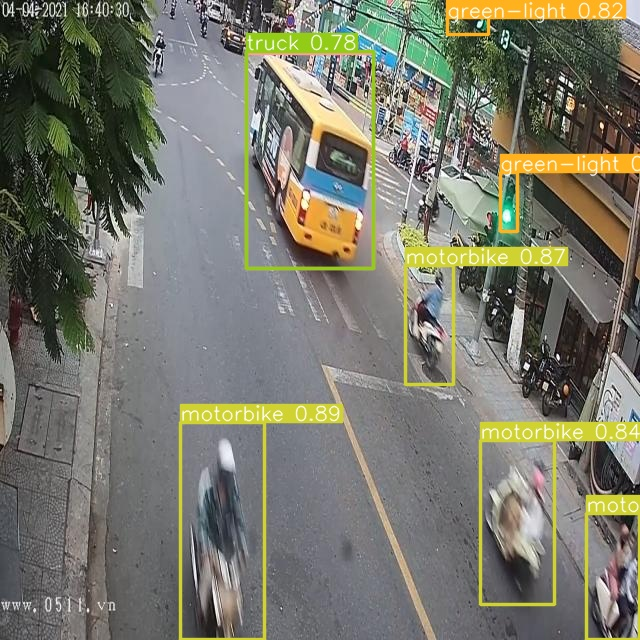

In [ ]:
Image(filename='/content/runs/detect/predict/09150443_jpg.rf.16d31a12129870d702b2948e8dd305c0.jpg', width=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/traffic-detection-36/test/images/CAME0014_jpg.rf.a2d086878b37dce9a0c59f9508ca7e88.jpg save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/traffic-detection-36/test/images/CAME0014_jpg.rf.a2d086878b37dce9a0c59f9508ca7e88.jpg: 800x800 3 motorbikes, 2 yellow-lights, 22.5ms
Speed: 7.3ms preprocess, 22.5ms inference, 747.8ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


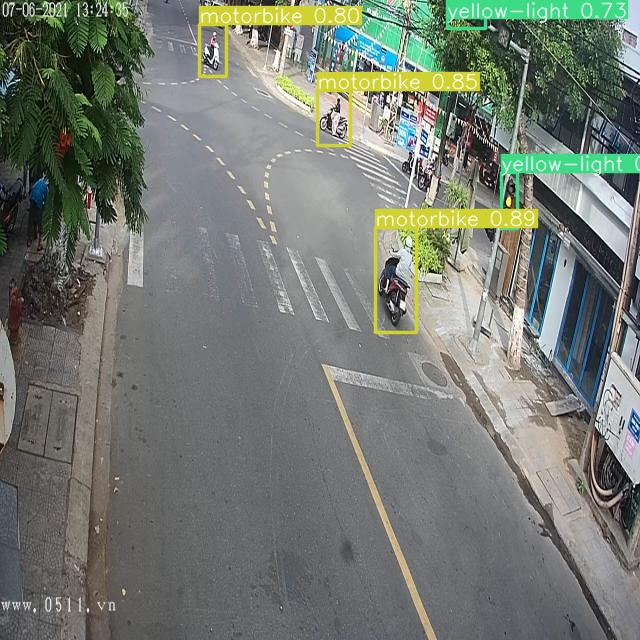

In [ ]:
Image(filename='/content/runs/detect/predict2/CAME0014_jpg.rf.a2d086878b37dce9a0c59f9508ca7e88.jpg', width=600)

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/Trafficdetectionruns/detect/train/weights/best.pt')

# Run the detection on the video
results = model.predict(source='/content/trafficvideo.mp4', conf=0.25, save=True)

# The annotated video and detection results will be saved in the "runs" directory




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/606) /content/trafficvideo.mp4: 480x800 1 bus, 3 cars, 4 motorbikes, 2 trucks, 78.3ms
video 1/1 (2/606) /content/trafficvideo.mp4: 480x800 1 bus, 3 cars, 4 motorbikes, 2 trucks, 15.7ms
video 1/1 (3/606) /content/trafficvideo.mp4: 480x800 1 bus, 2 cars, 5 motorbikes, 2 trucks, 15.6ms
video 1/1 (4/606) /content/trafficvideo.mp4: 480x800 1 bus, 2 cars, 4 motorbikes, 2 trucks, 15.6ms
video 1/1 (5/606) /content/trafficvideo.mp4: 480x800 1 bus, 

In [ ]:
from google.colab.patches import cv2_imshow
import cv2


cap = cv2.VideoCapture('/content/runs/detect/predict2/trafficvideo.avi')
while cap.isOpened():
    ret, image = cap.read()

    if not ret:
      break

    cv2_imshow(image) # Note cv2_imshow, not cv2.imshow

    cv2.waitKey(1) & 0xff

cv2.destroyAllWindows()
cap.release()